## Super Pixels
Pixels by itself contain very little information, grouping a region with them can increase the ammount of information stored and also may become less expensive to process them individually. 
A superpixel is precisely an agroupation of pixels. 

One of the most used libraries to obtain these superpixels is Slic.



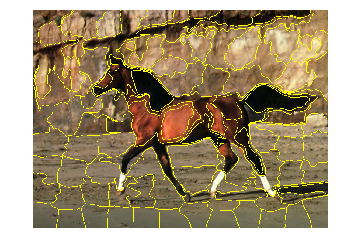

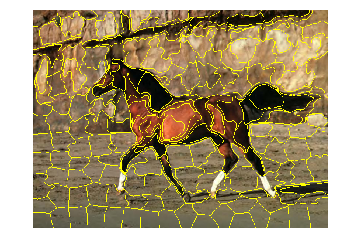

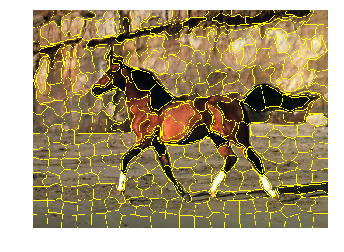

In [91]:
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
# load the image and convert it to a floating point data type
image = img_as_float(io.imread("horse/rgb/horse001.jpg"))
 
# loop over the number of segments
for numSegments in (100, 200, 300):
	# apply SLIC and extract (approximately) the supplied number
	# of segments
	segments = slic(image, n_segments = numSegments, sigma = 5)
 
	# show the output of SLIC
	fig = plt.figure("Superpixels -- %d segments" % (numSegments))
	ax = fig.add_subplot(1, 1, 1)
	ax.imshow(mark_boundaries(image, segments))
	plt.axis("off")
 # show the plots
plt.show()

In [145]:
segments = slic(image, n_segments = 100, sigma = 5)

In [108]:
image_l = img_as_float(io.imread("horse/figure_ground/horse001.jpg"))

# Labeling 

In [109]:
import cv2 as cv 
from skimage.measure import regionprops
img= cv.imread("horse/figure_ground/horse001.jpg")
img = cv.resize(img,(800,590))
image_1 = img_as_float(img)

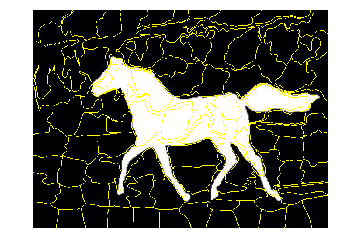

In [110]:
%matplotlib inline
fig = plt.figure("Superpixels -- %d segments" % (numSegments))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(image_1, segments))
plt.axis("off")
plt.show()

In [149]:
regionpro=regionprops(segments,img[:,:,1])
regionpro[3]["mean_intensity"]

2.2273286052009458

In [160]:
import numpy as np
prob=np.array([p.mean_intensity/255 for p in regionpro])
#prob = np.append(prob, [0.5,0.5,0.5])
prob = np.insert(prob, 0, [0])

labels=[0 if i<0.5 else 1 for i in prob]

In [161]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [133]:
a=prob[segments]
a.reshape((590, 800, 1));

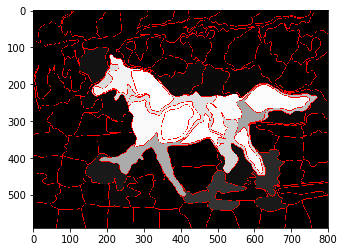

In [134]:
%matplotlib inline
plt.imshow(mark_boundaries(np.dstack((a,a,a)), segments, color=(1,0,0)));

[x] inspecting segment 0
[x] inspecting segment 1
[x] inspecting segment 2
[x] inspecting segment 3
[x] inspecting segment 4
[x] inspecting segment 5
[x] inspecting segment 6
[x] inspecting segment 7


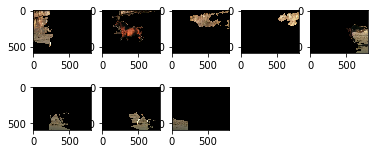

In [50]:
%matplotlib inline
import cv2

# loop over the unique segment values
for (i, segVal) in enumerate(np.unique(segments)[:10]):
    print("[x] inspecting segment %d" % (i))
    mask = np.zeros(image.shape[:2], dtype = "uint8")
    mask[segments == segVal] = 20
    i+=1
    plt.subplot(3,5,i)
    plt.imshow(cv2.bitwise_and(image, image, mask = mask))
    # construct a mask for the segment
    # show the masked region

In [51]:
regions=cv2.bitwise_and(image, image, mask = mask)

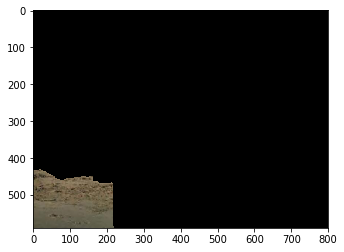

In [70]:
def f(x): return x!=0
plt.imshow(regions)


In [71]:
regions

array([[[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       ..., 
       [[ 0.3254902 ,  0.31372549,  0.23921569],
        

In [1]:
a=[1,2,3]

In [3]:
a[0:3]

[1, 2, 3]